In [5]:
library('igraph')

### Question 18

In [3]:
files = list.files(path="gplus/", pattern="*.circles")
morethan_2_count = 0
for (file in files) {
    count = length(unique(gsub("\\..*", "", files)))
    
    circle = paste("gplus/", file, sep="")
    if (length(readLines(circle)) > 2) {
        morethan_2_count = morethan_2_count + 1
    }
}

cat(paste("Number of personal networks:", count))
cat("\n")
cat(paste("Number of personal networks of users who have more than 2 circles:", morethan_2_count))

Number of personal networks: 132
Number of personal networks of users who have more than 2 circles: 57

### Question 19 & 20

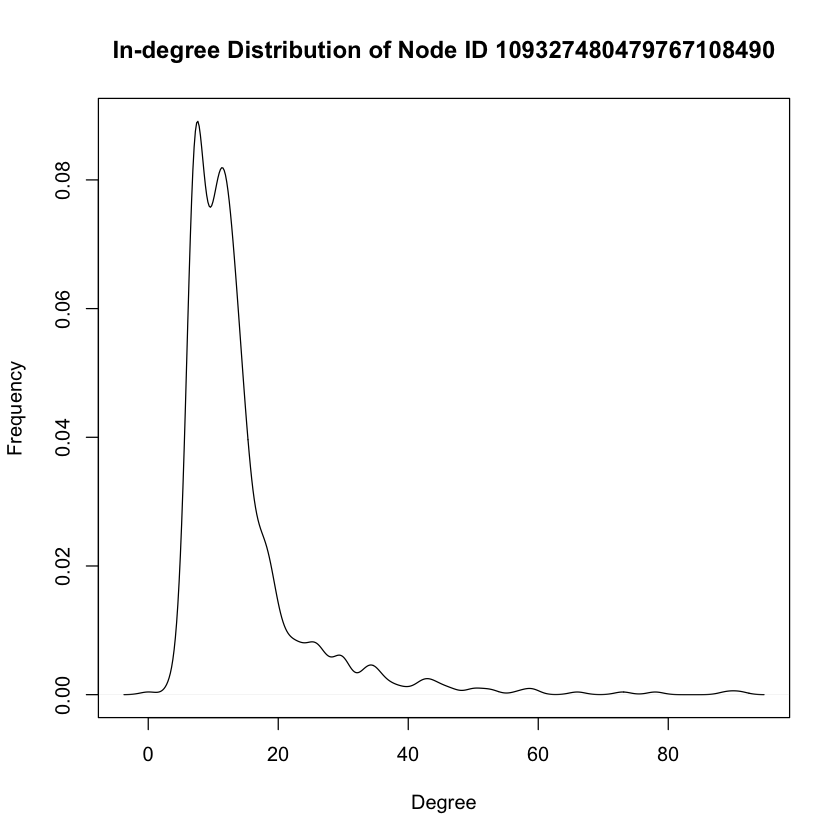

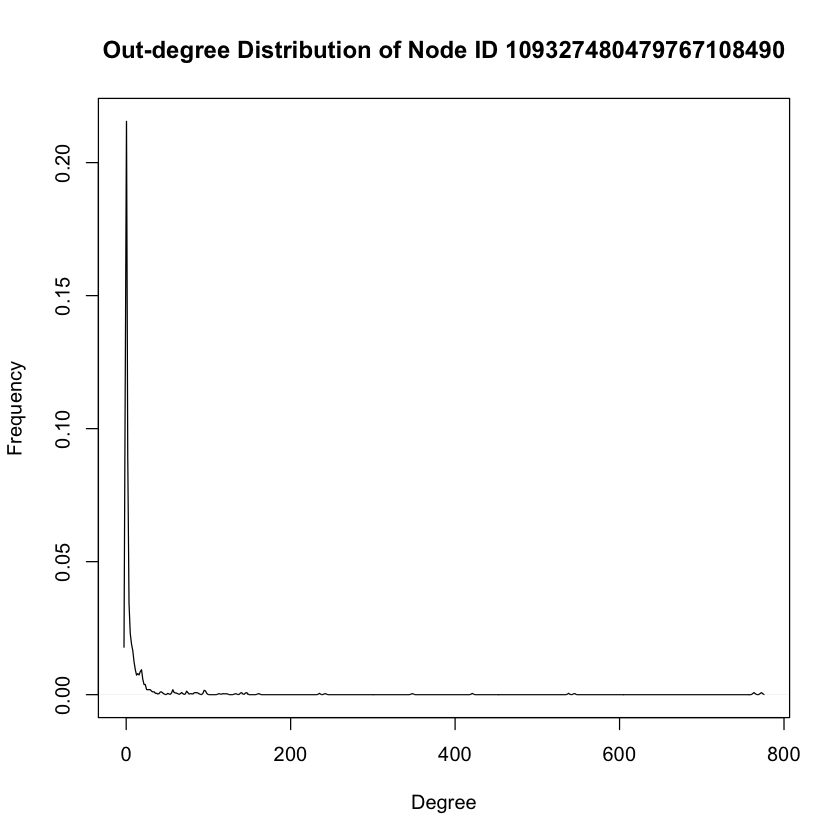

Modularity score of Node ID 109327480479767108490 : 0.252765387296677

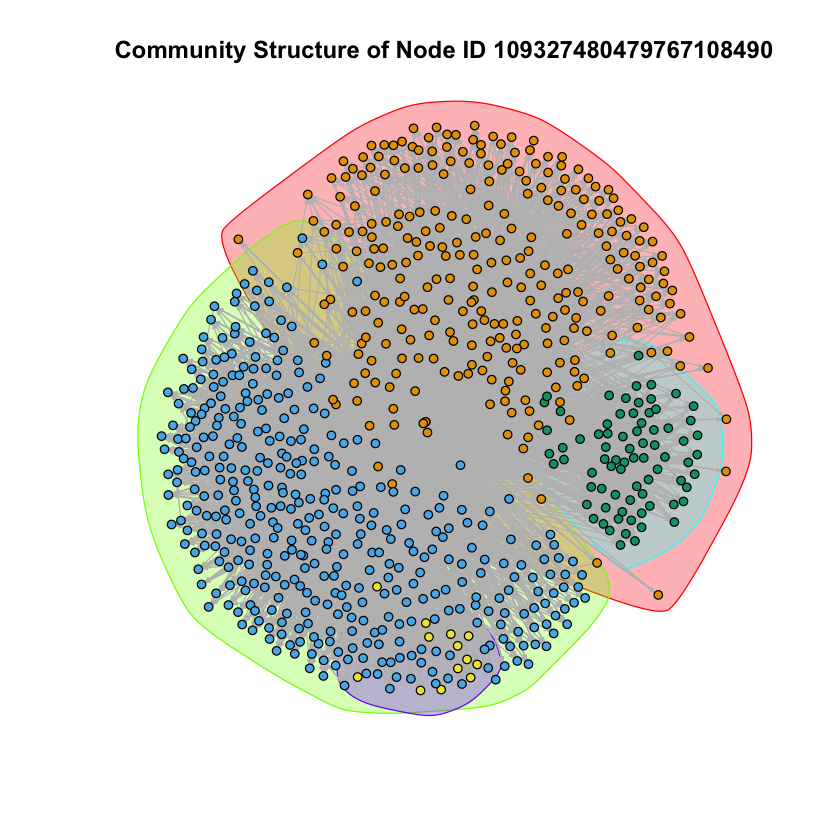

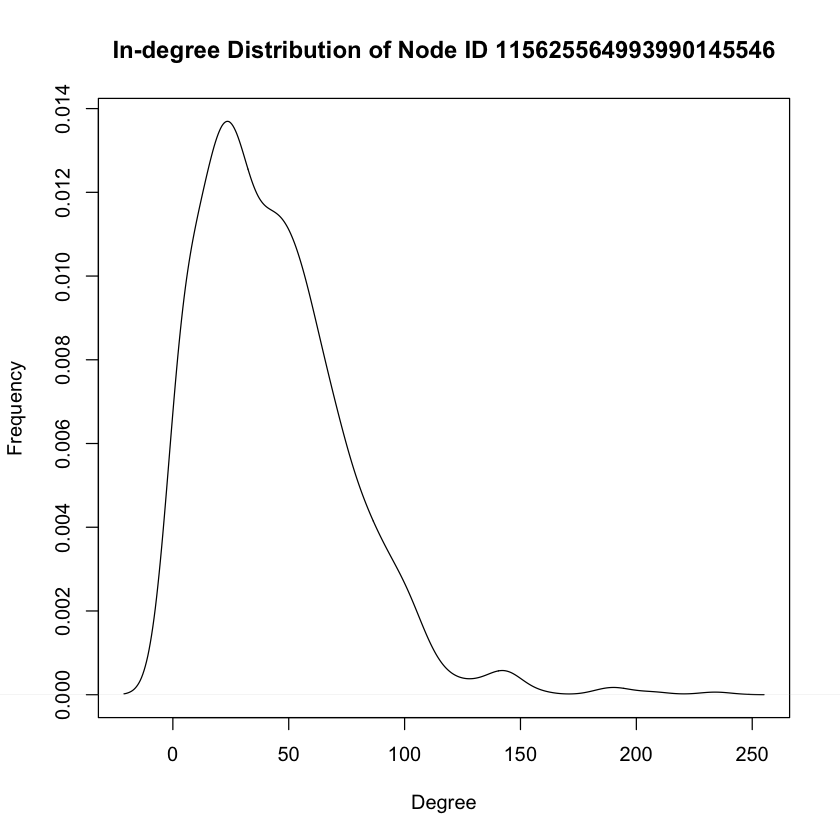

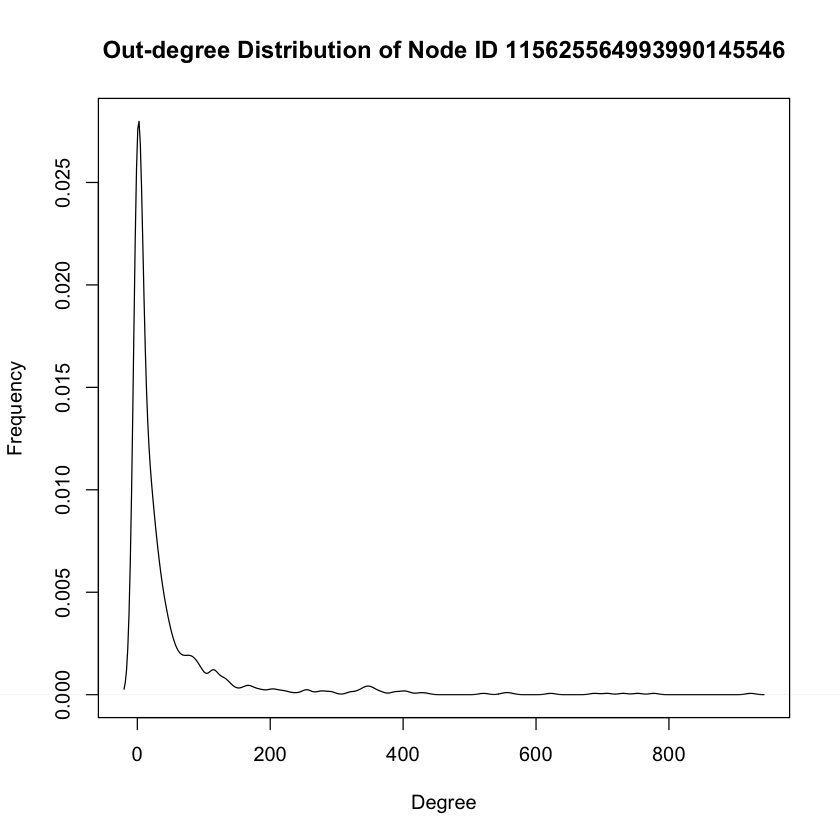

Modularity score of Node ID 115625564993990145546 : 0.319472551345825

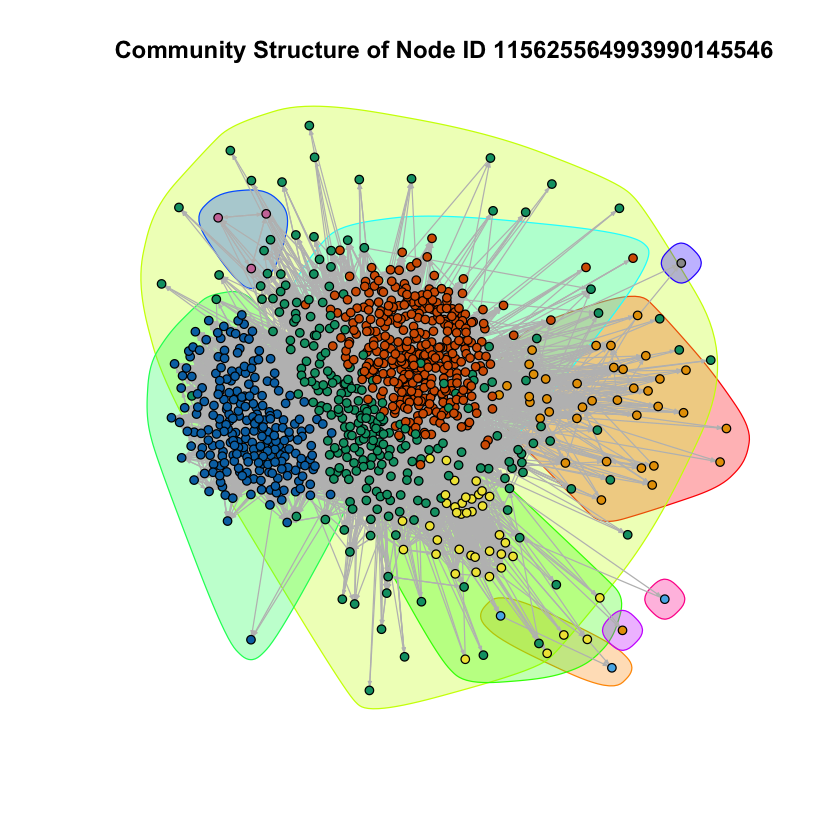

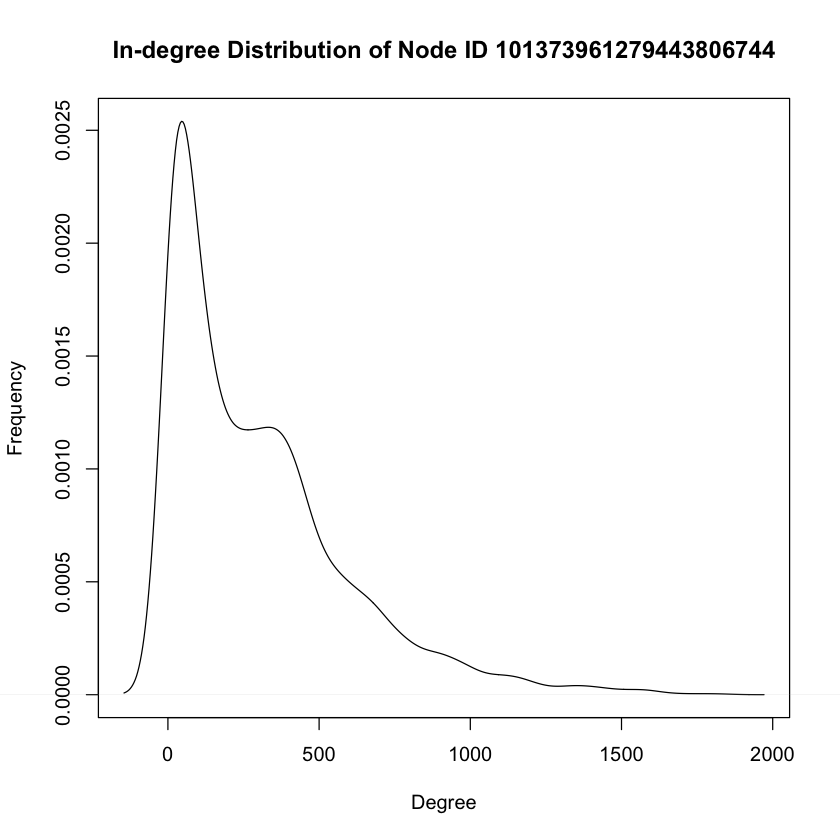

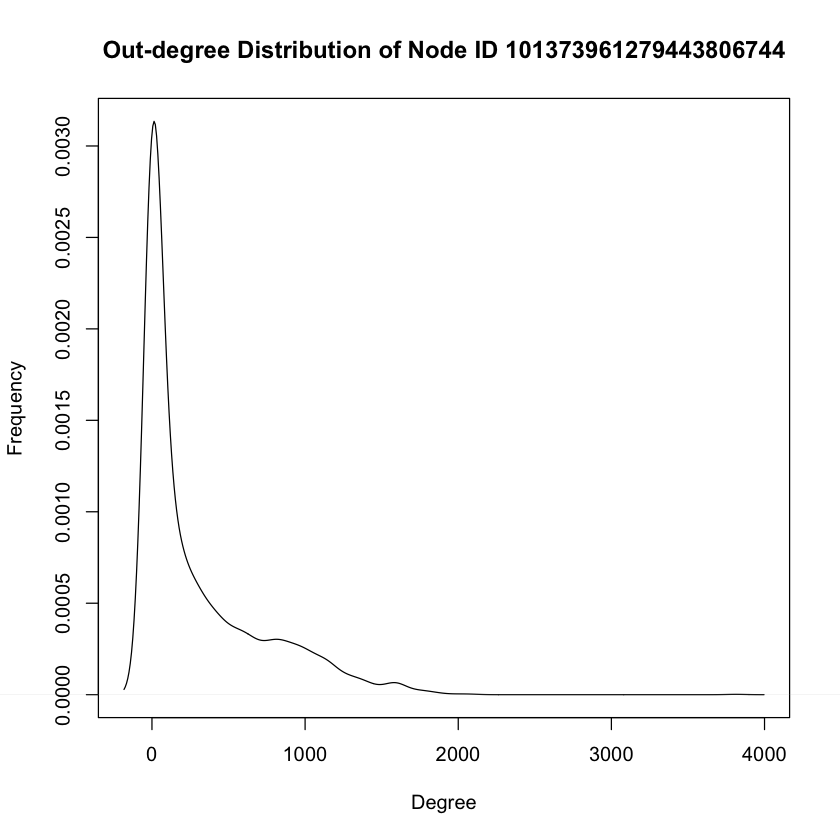

Modularity score of Node ID 101373961279443806744 : 0.191090270876884

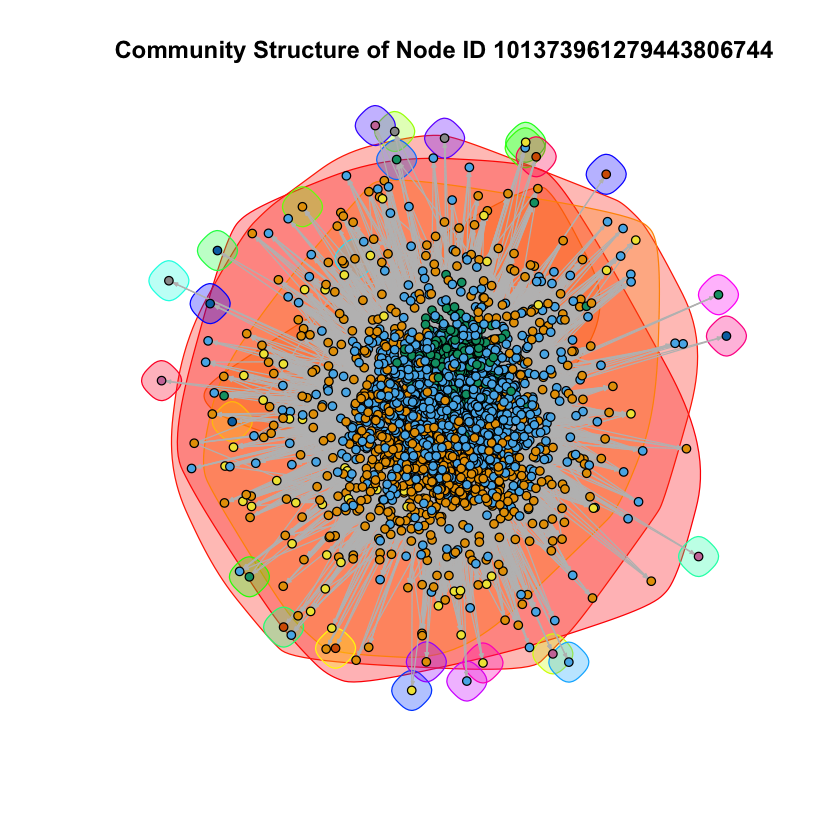

In [10]:
ids = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
for (id in ids) {
    file = paste("gplus/", id, ".edges", sep="")
    graph = read_graph(file, format="ncol", directed=TRUE)
    graph = add_vertices(graph, nv=1, name=id)
    idx = which(V(graph)$name==id)
    edge_list = c()
    for (vertex in 1:(vcount(graph)-1)) {
        edge_list = c(edge_list, c(idx, vertex))
    }
    graph = add_edges(graph, edge_list)
    
    # Question 19
    plot(density(degree(graph, mode='in')), type="l", main=paste("In-degree Distribution of Node ID", id),
         xlab="Degree", ylab="Frequency")
    plot(density(degree(graph, mode='out')), type="l", main=paste("Out-degree Distribution of Node ID", id),
         xlab="Degree", ylab="Frequency")
    
    # Question 20
    community = cluster_walktrap(graph)
    modularity_score = modularity(community)
    
    plot(community, graph, main=paste("Community Structure of Node ID", id), vertex.label=NA,
         vertex.size=3, edge.arrow.size=.2, edge.color="grey", layout=layout.fruchterman.reingold)
    cat(paste("Modularity score of Node ID", id, ":", modularity_score))
}